In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
# Read csv dataset
df = pd.read_csv("/content/balanced_emergency_triage_dataset.csv")

# Feature-target split
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"]

# Use 90% for training, 10% for testing (we still expect 100% accuracy)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Decision Tree setup — no restrictions (so it can perfectly overfit)
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=None,       # unlimited depth
    min_samples_split=2,  # no minimum
    min_samples_leaf=1,   # no leaf restriction
    random_state=42
)

# Train the model
model.fit(X_train, y_train)

# Evaluate on both train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, train_preds))
print("Test Accuracy:", accuracy_score(y_test, test_preds))
print("\nClassification Report:\n", classification_report(y_test, test_preds))


Train Accuracy: 0.9666666666666667
Test Accuracy: 0.95

Classification Report:
                              precision    recall  f1-score   support

             Cardiac Arrest       0.83      1.00      0.91         5
           Fainting/Syncope       1.00      1.00      1.00         4
               Heart Attack       1.00      1.00      1.00         6
      Major Trauma/Bleeding       1.00      0.86      0.92         7
       Seizure/Post-Seizure       0.86      1.00      0.92         6
Severe Respiratory Distress       1.00      0.50      0.67         2
             Shock/Collapse       1.00      1.00      1.00         6
                     Stroke       1.00      1.00      1.00         4

                   accuracy                           0.95        40
                  macro avg       0.96      0.92      0.93        40
               weighted avg       0.96      0.95      0.95        40



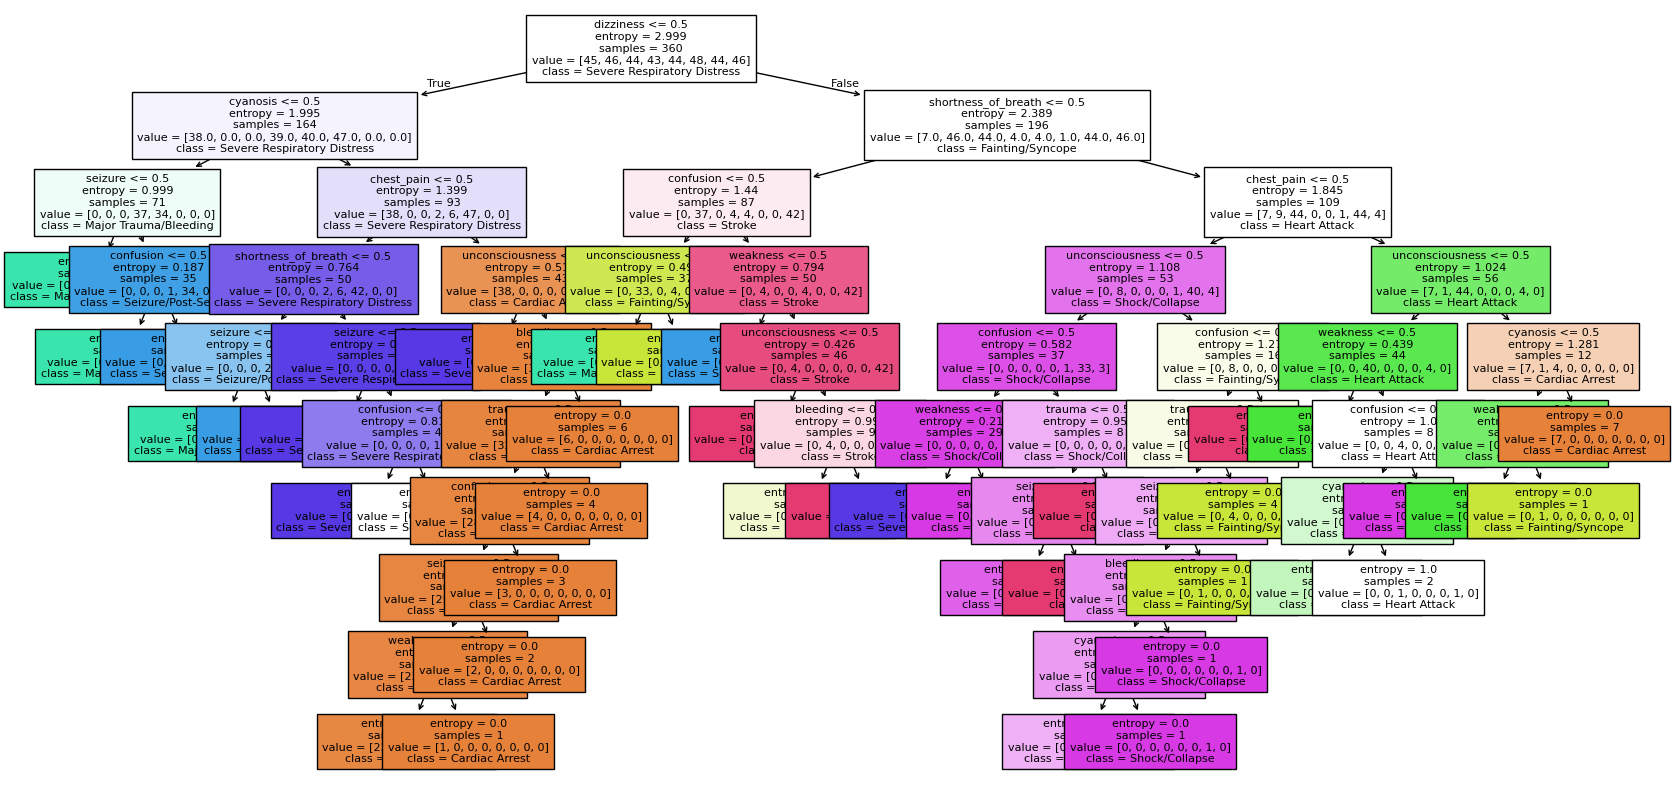

In [5]:
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, fontsize=8)
plt.show()


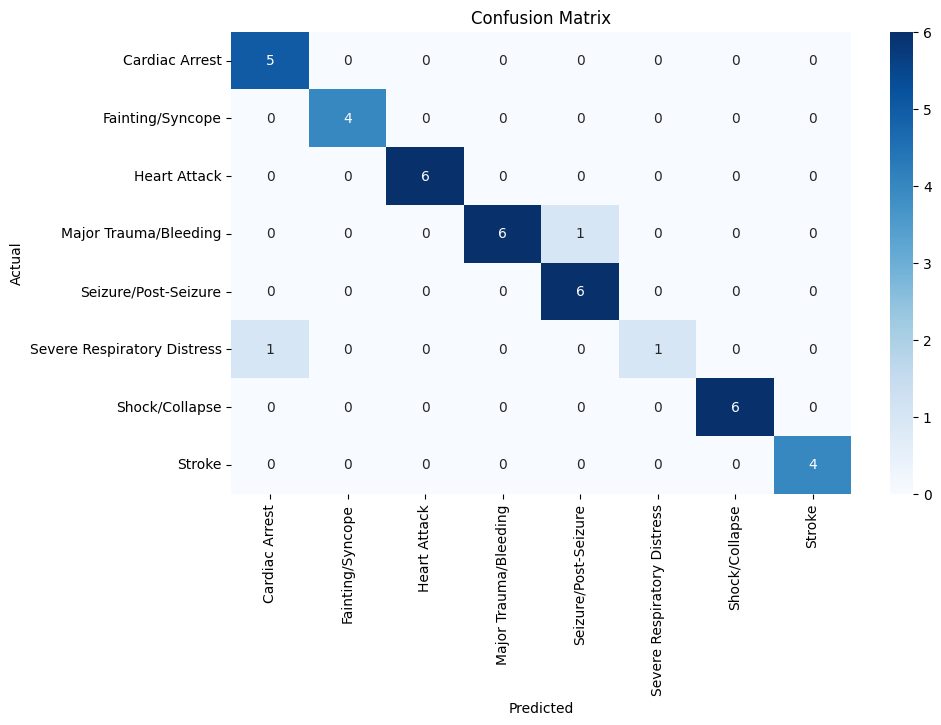

In [6]:
# Confusion Matrix
cm = confusion_matrix(y_test, test_preds, labels=model.classes_)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [7]:
# Check misclassified samples (if any)
misclassified = X_test[y_test != test_preds]
print("Misclassified samples count:", len(misclassified))
if len(misclassified) > 0:
    display(misclassified)

Misclassified samples count: 2


,chest_pain,shortness_of_breath,unconsciousness,bleeding,confusion,weakness,seizure,trauma,dizziness,cyanosis,Unnamed: 11,Unnamed: 12
231,0,0,0,1,1,0,1,1,0,0,NaN,NaN
158,1,1,1,0,0,0,0,0,0,1,NaN,NaN


In [8]:
from sklearn.metrics import classification_report

# Generate and print the classification report
report = classification_report(y_test, test_preds, digits=3)
print("Classification Report:\n")
print(report)


Classification Report:

                             precision    recall  f1-score   support

             Cardiac Arrest      0.833     1.000     0.909         5
           Fainting/Syncope      1.000     1.000     1.000         4
               Heart Attack      1.000     1.000     1.000         6
      Major Trauma/Bleeding      1.000     0.857     0.923         7
       Seizure/Post-Seizure      0.857     1.000     0.923         6
Severe Respiratory Distress      1.000     0.500     0.667         2
             Shock/Collapse      1.000     1.000     1.000         6
                     Stroke      1.000     1.000     1.000         4

                   accuracy                          0.950        40
                  macro avg      0.961     0.920     0.928        40
               weighted avg      0.958     0.950     0.947        40



In [10]:
#Save the model
import joblib
joblib.dump(model, 'emergency_triage_model.pkl')


['emergency_triage_model.pkl']